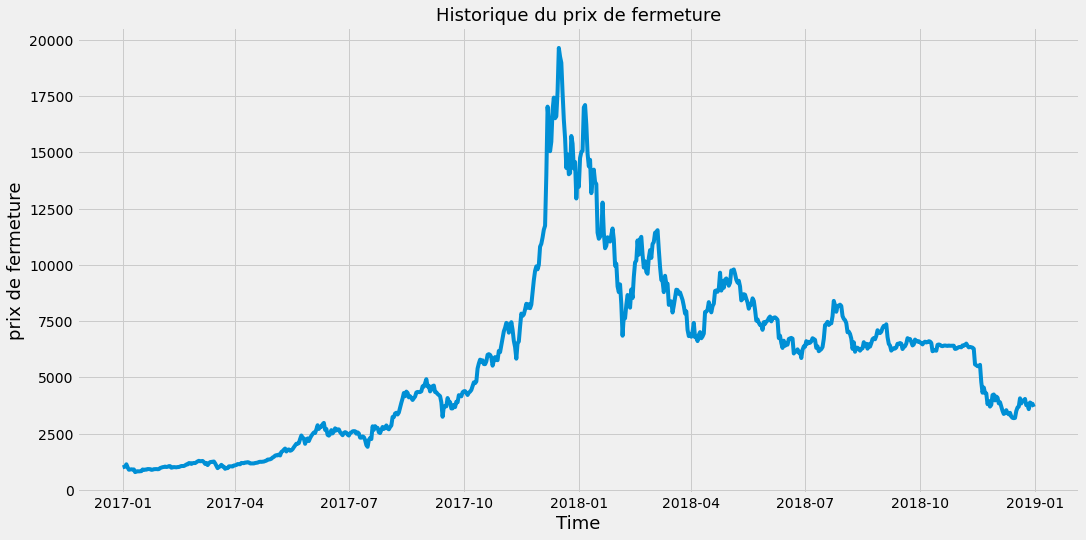

[1033.78597299825, 1172.5583396844, 2862.61129088252, 4777.53465692577, 10654.1072948568, 9652.21378872005, 7320.59482787843, 7358.81147895967, 6564.56826008182, 6267.9379912332]
[1028.17285628288, 2412.3662131502, 3925.73619023963, 17103.589279661, 7881.66192051432, 8398.62312653419, 6270.21479865576, 6383.95187580362, 6442.71541408533, 5574.25834891876]
[DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', length=730, freq=None)]
[5.61311671536987, -1239.8078734658002, -1063.1248993571103, -12326.054622735228, 2772.44537434248, 1253.5906621858594, 1050.3800292226697, 974.8596031560501, 121.85284599649003, 693.679642

In [1]:
#Utilisation de la simple moving average pour prédire l'évolution du bitcoin

#librairies
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#Chargement des données 
df = pd.read_csv('/Users/alexa/Downloads/btc.csv')

#set the date as the index
df = df.set_index(pd.DatetimeIndex(df['time'].values))
#show the data 
df = df.loc['2017':'2018']
df


#Visualisation du prix de fermeture 
plt.figure(figsize=(16,8))
plt.title('Historique du prix de fermeture',fontsize = 18)
plt.plot(df['PriceUSD'])
plt.xlabel('Time', fontsize=18)
plt.ylabel('prix de fermeture', fontsize = 18)
plt.show()

#Creation de la fonction qui va permettre de calculer la moyenne mobile simple (SMA)

def SMA(data, period = 30, column ='PriceUSD'):
    return data[column].rolling(window = period).mean()

#Création de 2 nouvelles colonnes pour stocker les valeurs des 20 et des 50 jours de SMA 

df['SMA15']= SMA(df, 15)
df['SMA35']= SMA(df, 35)

#Singal de vente et d'achat d'action Bitcoin 
df['Signal'] = np.where(df['SMA15'] > df['SMA35'],1,0)

df['Position'] = df['Signal'].diff()

df['Acheter'] = np.where(df['Position'] == 1, df['PriceUSD'], 0)

df['Vendre'] = np.where(df['Position'] == -1, df['PriceUSD'], 0)

PrixAchat = []
PrixVente = []
for i in df['Acheter']:
    if i != 0:
        PrixAchat.append(i)
print(PrixAchat)
    
for i in df['Vendre']:
    if i != 0:
        PrixVente.append(i)
print(PrixVente)



a = []
if np.where(df['Position'] == 1):
    a.append(df['Acheter'].index)

print(a)


Gain = []
for i in range (len(PrixAchat)):
    x = PrixAchat[i]
    y = PrixVente[i]
    Gain.append(x-y)
print(Gain)  



GainTotaux = []
for i in range (len(PrixAchat)):
    x = PrixAchat[i]
    y = PrixVente[i]
    GainTotaux.append(x-y)
    
mean = sum(GainTotaux)/len(GainTotaux)
print(mean)
print(GainTotaux)  


print(df['Acheter'].values)



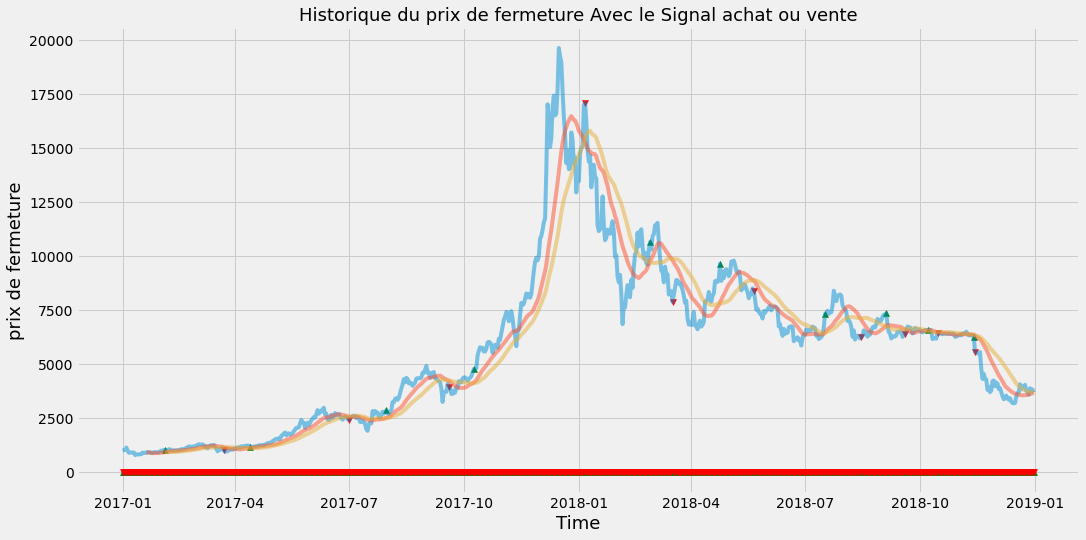

[5.61311671536987, -1239.8078734658002, -1063.1248993571103, -12326.054622735228, 2772.44537434248, 1253.5906621858594, 1050.3800292226697, 974.8596031560501, 121.85284599649003, 693.6796423144397]
-775.656612162478


In [2]:
#Affichage du prix du Bitcoin avec la SMA et le singal d'achat et de vente Sur 2 SMA20 / SMA35
 
plt.figure(figsize=(16,8))
plt.title('Historique du prix de fermeture Avec le Signal achat ou vente',fontsize = 18)
plt.plot(df['PriceUSD'], alpha =0.5, label ='Prix Bitcoin')
plt.plot(df['SMA15'], alpha =0.5, label ='SMA20')
plt.plot(df['SMA35'], alpha =0.5, label ='SMA35')
plt.scatter(df.index, df['Acheter'], alpha =1, label = 'Signal Achat', marker = '^', color = 'green')
plt.scatter(df.index, df['Vendre'], alpha =1, label = 'Signal Vente', marker = 'v', color = 'red')

plt.xlabel('Time', fontsize=18)
plt.ylabel('prix de fermeture', fontsize = 18)
plt.show()

print(Gain)
print(mean)